<a href="https://colab.research.google.com/github/ArtemKarDev/Kaggle/blob/main/EDA_Netflix_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Netflix - развивающийся популярный стриминговый сервис. 

Проведем разведочный анализ данных с использованием интерактивной библиотеки визулизации данных - Plotly. <br>
Построим рекомендательную систему

Визуальный анализ данных 
1. Анализ набора данных Netflix
2. Составление системы рекомендаций для пользователей (Content based filtering)

In [6]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


Загрузил датасет с https://www.kaggle.com/datasets/shivamb/netflix-shows
к себе на google-диск 

In [7]:
# загружаем датасет в ноутбус с моего google-диска
!wget 'https://drive.google.com/uc?id=1JscRWVxO3DyBBBBr21fpeRHeUcmN5yhL' -O netflix_titles.csv


--2022-08-01 13:38:40--  https://drive.google.com/uc?id=1JscRWVxO3DyBBBBr21fpeRHeUcmN5yhL
Resolving drive.google.com (drive.google.com)... 142.250.141.139, 142.250.141.100, 142.250.141.138, ...
Connecting to drive.google.com (drive.google.com)|142.250.141.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-14-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/03to81dbskim406tbpqbrgjkc932dnfr/1659361050000/00838955718561688027/*/1JscRWVxO3DyBBBBr21fpeRHeUcmN5yhL?uuid=fae01a25-6f28-43b4-9f20-d2aea2bfc956 [following]
--2022-08-01 13:38:42--  https://doc-08-14-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/03to81dbskim406tbpqbrgjkc932dnfr/1659361050000/00838955718561688027/*/1JscRWVxO3DyBBBBr21fpeRHeUcmN5yhL?uuid=fae01a25-6f28-43b4-9f20-d2aea2bfc956
Resolving doc-08-14-docs.googleusercontent.com (doc-08-14-docs.googleusercontent.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to doc

In [8]:
netflix_overall = pd.read_csv('netflix_titles.csv')
netflix_overall.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
773,s774,Movie,The Girl and the Gun,Rae Red,"Janine Gutierrez, Felix Roco, JC Santos, Elija...",Philippines,"June 3, 2021",2019,TV-MA,78 min,"Dramas, International Movies, Thrillers","Fed up with abuse by those around her, a depar..."
6022,s6023,Movie,6-5=2,Bharat Jain,"Prashantt Guptha, Gaurav Paswala, Gaurav Kotha...",India,"November 1, 2017",2014,TV-MA,103 min,"Horror Movies, International Movies, Thrillers",Six friends decide to undertake a grueling mou...
6525,s6526,Movie,Concrete Football,"Jesse Adang, Syrine Boulanouar",NaN,"Czech Republic, France","September 1, 2017",2016,TV-MA,52 min,"Documentaries, International Movies, Sports Mo...",The development of professional soccer worldwi...
6885,s6886,TV Show,Gossip Girl,NaN,"Blake Lively, Leighton Meester, Penn Badgley, ...",United States,"October 8, 2013",2012,TV-14,6 Seasons,"TV Dramas, Teen TV Shows",A group of hyperprivileged Manhattan private-s...
3497,s3498,Movie,Under the Eiffel Tower,Archie Borders,"Matt Walsh, Judith Godreche, Reid Scott, Micha...",United States,"September 23, 2019",2018,TV-MA,87 min,"Comedies, Independent Movies, International Mo...",An American man in the midst of a mid-life cri...
5950,s5951,Movie,Triumph of the Heart,Richard Michaels,"Mario Van Peebles, Susan Ruttan, Lane R. Davis...",United States,"October 1, 2011",1991,TV-PG,93 min,"Dramas, Sports Movies","This drama tells the tale of Ricky Bell, a pro..."
5714,s5715,Movie,Divines,Houda Benyamina,"Déborah Lukumuena, Jisca Kalvanda, Kévin Misch...","France, Qatar","November 18, 2016",2016,TV-MA,107 min,"Dramas, Independent Movies, International Movies",A shrewd teenager and her wisecracking best fr...
5892,s5893,Movie,Circle,"Aaron Hann, Mario Miscione","Julie Benz, Mercy Malick, Carter Jenkins, Moll...",United States,"October 16, 2015",2015,TV-MA,86 min,"Dramas, Independent Movies, Sci-Fi & Fantasy",When a group of strangers is seized and awaits...
7935,s7936,Movie,Sarah's Key,Gilles Paquet-Brenner,"Aidan Quinn, Kristin Scott Thomas, Frédéric Pi...",France,"September 21, 2019",2010,PG-13,102 min,"Dramas, International Movies","Paris, 1942: To protect her brother from the p..."
4430,s4431,TV Show,Creators,NaN,"Fabio Aste, Héctor Segura, Sebastian Rosas",Argentina,"November 1, 2018",2015,TV-Y,2 Seasons,"Kids' TV, Spanish-Language TV Shows",Two brilliant scientists discover the hidden v...


In [9]:
netflix_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


наблюдаем наличие пропусков в некоторых колонках, но для разведки это не кретично.

In [10]:
netflix_shows = netflix_overall[netflix_overall['type'] == 'TV Show'].copy()

netflix_movie = netflix_overall[netflix_overall['type'] == 'Movie'].copy()

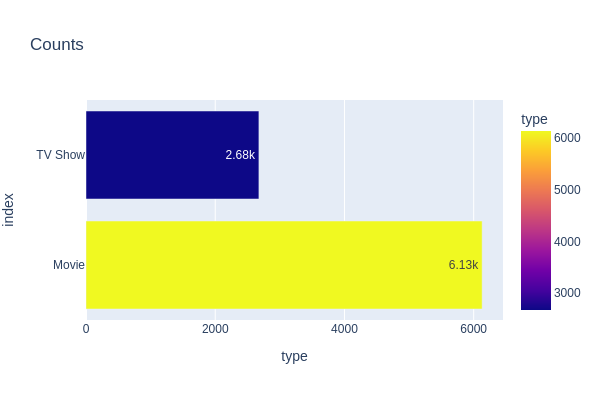

In [12]:
netflix_counts = netflix_overall['type'].value_counts()

fig = px.bar(netflix_counts, x="type", color='type', title="Counts", text_auto='.3s')
fig.update_layout(autosize=False, width=600, height=400)
fig.show('png')


Количество фильмов на Netflix больше чем сериалов более чем в 2 раза

### Длительность видеоконтента

In [13]:
topdirs = pd.value_counts(netflix_overall['duration'])
topdirs.head(10)

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
97 min        146
93 min        146
91 min        144
95 min        137
96 min        130
Name: duration, dtype: int64

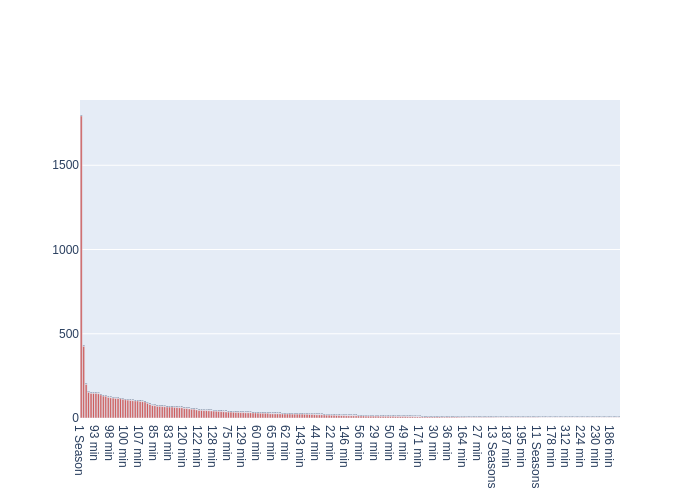

In [15]:
from plotly import graph_objects as go

fig = go.Figure([ 
      go.Bar(x=topdirs.index, 
             y=topdirs.values, 
             text=topdirs.values, 
             marker_color='indianred'
             ) 
      ])

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show('png')

Длительность в таблице указана в текстовом формате. Чаще всего указывается длительность - 'Season', тоесть Сезон - для твшоу(сериалов). но мы же знаем что фильмов больше, да - но длительность фильмов очень сильно вариативна.

# Анализ фильмов

## Какой месяц, самый перспективный для релиза контента?
вычислим месяц с наименьшим количеством публикуемого контента - для наименьшей конкуренции за зрителя

In [16]:
# проверим есть ли пропуски в датах публикации фильма
netflix_overall.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [17]:
# дропнем записи с пустой датой публикации
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date.isna().sum()

date_added    0
dtype: int64

In [18]:
# посмотрим что получилось
netflix_date.sample(5)

,date_added
4022,"March 13, 2019"
7768,"January 1, 2016"
4130,"February 5, 2019"
4824,"June 18, 2018"
1724,"November 6, 2020"


из этой записи необходимо выделить год и месяц - добавим их в новые столбцы

In [19]:
netflix_date['year'] = netflix_date['date_added'].apply(lambda x: x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x: x.lstrip().split(' ')[0])
netflix_date.head()

,date_added,year,month
1,"September 24, 2021",2021,September
2,"September 24, 2021",2021,September
3,"September 24, 2021",2021,September
4,"September 24, 2021",2021,September
5,"September 24, 2021",2021,September


In [20]:
# посмотрим на самые ранние добавления фильмов
netflix_date.sort_values(by=['year','month']).head()

,date_added,year,month
6611,"February 4, 2008",2008,February
5940,"August 2, 2013",2013,August
7112,"March 31, 2013",2013,March
6885,"October 8, 2013",2013,October
7908,"October 14, 2013",2013,October


Интересно - между первой и второй публикацией фильмов 5 лет - видимо в этот период пуликовали только сериалы.

In [21]:
# для сортировки по месяцу сделаем споком месяцев
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] #[::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
df

year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,
January,0.0,0.0,0.0,0.0,28.0,14.0,24.0,37.0,53.0,36.0
February,1.0,0.0,1.0,1.0,6.0,17.0,24.0,45.0,42.0,44.0
March,0.0,1.0,0.0,2.0,3.0,38.0,35.0,53.0,44.0,37.0
April,0.0,0.0,1.0,4.0,8.0,27.0,28.0,43.0,50.0,53.0
May,0.0,0.0,0.0,1.0,4.0,23.0,27.0,48.0,52.0,38.0
June,0.0,0.0,0.0,2.0,7.0,29.0,28.0,46.0,41.0,83.0
July,0.0,0.0,0.0,2.0,9.0,34.0,27.0,59.0,43.0,88.0
August,0.0,1.0,0.0,0.0,11.0,38.0,34.0,44.0,47.0,61.0
September,0.0,1.0,0.0,1.0,19.0,32.0,43.0,37.0,53.0,65.0


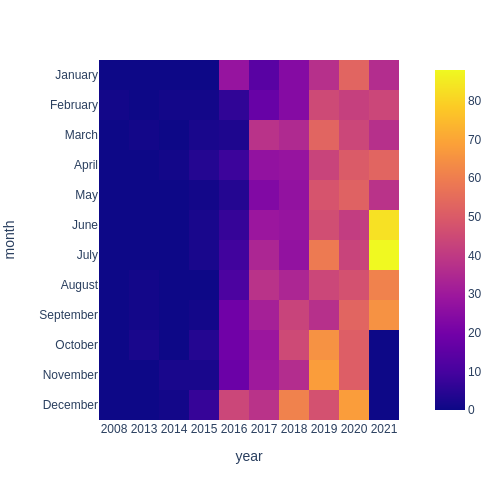

In [22]:
fig = px.imshow(df,width=500, height=500)
fig.show('png')

С помощью plotly  очень просто визуализировать. Всё параметры применилиь автоматически - видим по самой яркой точке - июль 2021го самый "жаркий" месяц по публикациям фильмов.<br>
Но нам наиболее интересен наоборот самый холодный месяц - например январь несколько лет подряд в этот месяц наименьшее количество публикаций, но в связи с праздниками и длинными ввыходнымидолжно быть наибольшее количество просмотров. Но в США с 3го января уже начинают работать. Будем целиться на Российский сегмент зрителей.

## Рейтинги фильмов


исследуем взрасной рейтинг фильмов

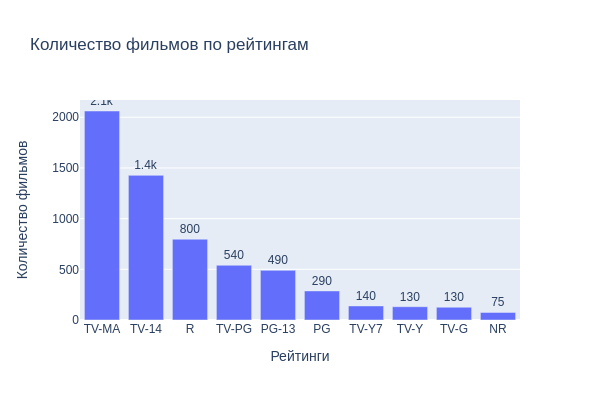

In [24]:
fig = go.Figure([ 
      go.Bar(y=netflix_movie['rating'].value_counts(), 
             x=netflix_movie['rating'].value_counts().index[:10], 
             text=netflix_movie['rating'].value_counts().values
             ) 
      ])

fig.update_layout(#legend_orientation="h",
                  #legend=dict(x=.5, xanchor="center"),
                  title="Количество фильмов по рейтингам",
                  xaxis_title="Рейтинги",
                  yaxis_title="Количество фильмов",
                  #margin=dict(l=0, r=0, t=30, b=0),
                  width=600, height=400)

fig.update_traces(texttemplate='%{text:.2s}', 
                  textposition='outside')
fig.show('png')

1. ТV-МА - Самая большая группа. Такой рейтинг дается фильмам только для взрослой аудитории.
2. ТV-14 - Вторая группа по величине. Контент фильма с таким рейтингом не подходит для детей младше 14 лет.
3. R - Фильмы не подходят для просмотра детям до 17 лет.

## Анализ года выпуска фильма

In [26]:
df_release = netflix_movie['release_year'].value_counts()[:15]

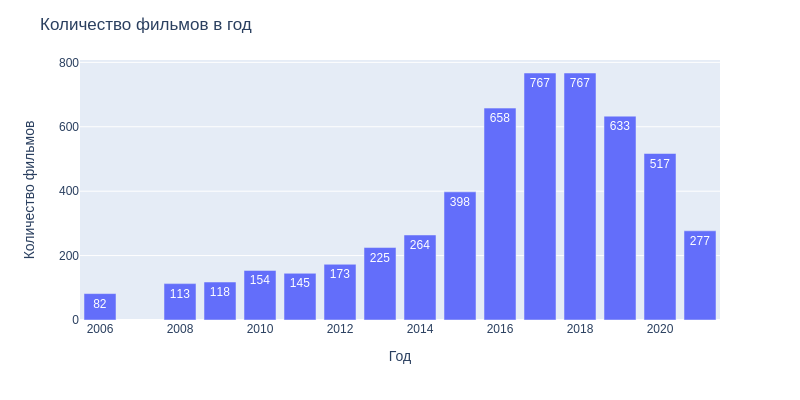

In [27]:
fig = px.bar(y=df_release.values, 
             x=df_release.index, 
             text=df_release.values)
fig.update_layout(title="Количество фильмов в год",
                  xaxis_title="Год",
                  yaxis_title="Количество фильмов",
                  width=800, height=400)
fig.show('png')

2017 и 2018 самый частый год выпуска фильмов

## Топ 10 стран по выпуску фильмов

In [28]:
#  проверим на пропуски 
netflix_movie.isna().sum()

show_id           0
type              0
title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

в колонке "страна" - есть пропуски  - но  не будем избовляться от этих записей - заполним их неизвестностью

In [29]:
netflix_movie['country'].fillna("Unknow", inplace=True)
netflix_movie.isna().sum()

show_id           0
type              0
title             0
director        188
cast            475
country           0
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

In [30]:
netflix_movie['country'].value_counts()

United States                            2058
India                                     893
Unknow                                    440
United Kingdom                            206
Canada                                    122
                                         ... 
United Kingdom, Russia, United States       1
Paraguay, Argentina                         1
United Kingdom, Malawi                      1
Austria, Iraq, United States                1
United Arab Emirates, Jordan                1
Name: country, Length: 652, dtype: int64

В некоторых записях есть перечень стран учавствовавших в создании фильма - 

In [31]:
countries_mov = {} # подготовим словарь для хранения страны с количеством упонинаий в колонке country

cou = list(netflix_movie['country']) # соберем все записи из колонки country в список
for i in cou:               # пройдемся по этому списку
    i = i.replace(' ', '') # уберем пробелы если есть
    i = list(i.split(',')) # и разделим по запятым

    for j in i:   # теперь пройдемся по разделенным записям
        if j in list(countries_mov.keys()):  # и будем добавлять или увеличивать счетчик при наличии страны в словаре
            countries_mov[j] += 1
        else:
            countries_mov[j] = 1

# отсортируем и возьмем 10 первых чаще упоминающихся стран
countries_fin = sorted(countries_mov.items(), key=lambda item: countries_mov[item[0]], reverse=True)[:10]
countries_fin

[('UnitedStates', 2752),
 ('India', 962),
 ('UnitedKingdom', 534),
 ('Unknow', 440),
 ('Canada', 319),
 ('France', 303),
 ('Germany', 182),
 ('Spain', 171),
 ('Japan', 119),
 ('China', 114)]

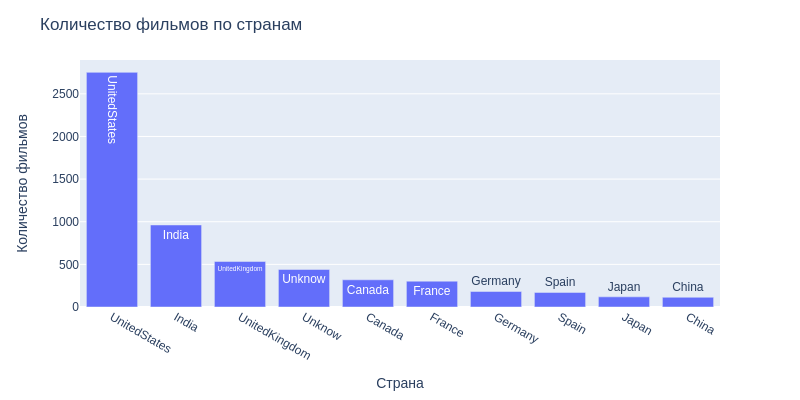

In [33]:
# визуализируем полученные данные
names = [name for name, values in countries_fin]
values = [values for name, values in countries_fin]

fig = px.bar(x=names, 
             y=values, 
             text=names)
fig.update_layout(title="Количество фильмов по странам",
                  xaxis_title="Страна",
                  yaxis_title="Количество фильмов",
                  width=800, height=400)
fig.show('png')

## Анализ продолжительноси фильмов


In [34]:
netflix_movie['duration'].value_counts().head()

90 min    152
94 min    146
93 min    146
97 min    146
91 min    144
Name: duration, dtype: int64

In [35]:
netflix_movie['duration'].isna().sum()

3

In [36]:
netflix_movie['duration'].fillna(netflix_movie['duration'].mode()).shape

(6131,)

In [37]:
netflix_movie['duration'] = netflix_movie['duration'].fillna(netflix_movie['duration'].mode())
netflix_movie['duration'] = netflix_movie['duration'].dropna()
netflix_movie[netflix_movie['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


преобразуем тип значений для отрисовки частотности

In [38]:
# удалим слово min
netflix_movie['duration'] = netflix_movie['duration'].str.replace(' min', '')
# оставшиеся цифры переведем в int
netflix_movie['duration'] = netflix_movie['duration'].astype(int)
netflix_movie['duration']

ValueError: ignored

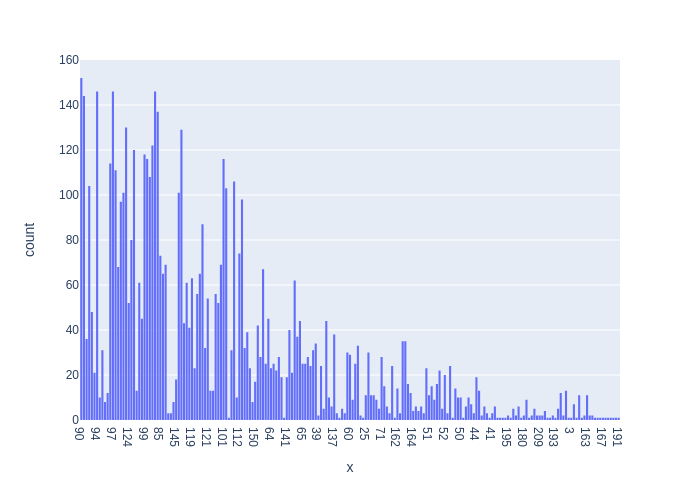

In [39]:
fig = px.histogram(x=netflix_movie['duration'])
fig.show('png')

## Анализ жанров